In [1]:
import random
import os
import urllib3
import pandas as pd
from pandas import Series
import geopandas as gpd
from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imageio
from matplotlib.lines import Line2D
import math

COMMON_DIR = os.path.join(os.pardir, 'common')
sys.path.insert(1, COMMON_DIR)

import data_retreiver
import time_adjusted_price as money
print(dir(data_retreiver))
from datetime import date

['DATASETS', 'DATA_PATH', 'FAMILY_DATASETS', 'GEO_DATA', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'download_datasets', 'download_family_datasets', 'download_file', 'download_geo_data', 'gpd', 'load_csv_datasets', 'load_geo_datasets', 'os', 'pd', 'urllib3']


In [2]:
data_retreiver.download_family_datasets()
data_retreiver.download_geo_data()
print()

In [3]:
(fam_core, assmt_area_info) = data_retreiver.load_csv_datasets("single_family_core", "single_family_areas_info")
assessment_areas = data_retreiver.load_geo_datasets("single_family_areas_shapes")[0]

In [4]:
assmt_area_info

,Area_Numbe,Num_Homes,Growth_Std,Growth_Mean,Sales_Price_Std,Sales_Price_Mean,Black_Percentage,Population,Male_Proportion,Female_Proportion,Hispanic_Percentage,White_Percentage,Asian_Percentage,Income_Per_Capita,Poverty_Percentage
0,102,323,7949.015486,2736.883347,47082.532141,250924.020635,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
1,102,323,7949.015486,2736.883347,47082.532141,250924.020635,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
2,122,304,NaN,NaN,43360.625648,328108.081349,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
3,31,462,4028.798217,-158.141803,79139.813449,201066.369550,6.100000,3246.000000,0.511091,0.488909,6.100000,80.800000,5.200000,28681.000000,11.900000
4,33,566,4415.112869,-961.066618,80354.654981,189102.912359,4.427915,2555.300353,0.507041,0.492959,4.042049,88.131449,2.177385,31651.522968,7.912721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,102,323,7949.015486,2736.883347,47082.532141,250924.020635,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
135,121,71,10274.027840,-9064.812445,67613.292220,260850.204225,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
136,120,89,3338.510367,-2961.311382,29343.708205,260983.191011,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
137,123,199,4805.090452,-863.655581,108611.244865,129735.012657,17.300000,6935.000000,0.593944,0.406056,29.100000,33.300000,14.700000,15794.000000,32.400000


<AxesSubplot:>

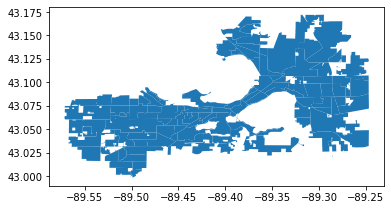

In [5]:
assessment_areas.plot()

In [6]:
areas_with_info = assessment_areas.set_index("Area_Numbe").join(assmt_area_info.set_index("Area_Numbe"))
areas_with_info

,OBJECTID,ORIG_FID,SHAPESTAre,SHAPESTLen,geometry,Num_Homes,Growth_Std,Growth_Mean,Sales_Price_Std,Sales_Price_Mean,Black_Percentage,Population,Male_Proportion,Female_Proportion,Hispanic_Percentage,White_Percentage,Asian_Percentage,Income_Per_Capita,Poverty_Percentage
Area_Numbe,,,,,,,,,,,,,,,,,,,
1,95,98.0,1.265732e+07,19570.527368,"POLYGON ((-89.46798 43.03184, -89.46798 43.031...",647,3061.344375,-1215.515581,61405.618464,210999.793764,9.258192,5531.906491,0.488420,0.511580,7.220711,76.709815,5.583230,37154.208655,10.152937
2,98,101.0,2.552896e+07,25169.923759,"POLYGON ((-89.45274 43.03694, -89.46114 43.030...",791,4604.803243,-600.881864,76099.103994,244051.892782,9.200000,4364.000000,0.478231,0.521769,6.600000,79.600000,4.400000,36601.000000,12.500000
3,85,87.0,8.779291e+06,13496.394897,"POLYGON ((-89.51137 43.01582, -89.51138 43.015...",346,5809.680237,205.933926,59336.746641,251097.612428,9.350000,7374.500000,0.497932,0.502068,8.200000,72.150000,7.450000,38027.000000,6.450000
4,75,76.0,1.852498e+07,24030.005200,"POLYGON ((-89.43001 43.03530, -89.42465 43.035...",336,6618.280265,-765.784834,79482.812726,301282.964935,16.900000,5242.000000,0.486456,0.513544,19.900000,57.200000,3.300000,26494.000000,23.900000
4,75,76.0,1.852498e+07,24030.005200,"POLYGON ((-89.43001 43.03530, -89.42465 43.035...",336,6618.280265,-765.784834,79482.812726,301282.964935,16.900000,5242.000000,0.486456,0.513544,19.900000,57.200000,3.300000,26494.000000,23.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,557,2.0,3.101062e+06,7728.759792,"POLYGON ((-89.28608 43.03148, -89.28608 43.031...",71,10274.027840,-9064.812445,67613.292220,260850.204225,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
122,4,2.0,7.214181e+06,13587.720415,"POLYGON ((-89.27876 43.03727, -89.27683 43.037...",304,NaN,NaN,43360.625648,328108.081349,5.100000,3276.000000,0.503663,0.496337,1.500000,80.800000,5.700000,36430.000000,6.300000
123,561,92.0,8.655775e+06,16266.033335,"POLYGON ((-89.38112 43.05242, -89.38123 43.052...",199,4805.090452,-863.655581,108611.244865,129735.012657,17.300000,6935.000000,0.593944,0.406056,29.100000,33.300000,14.700000,15794.000000,32.400000


In [12]:
areas_with_info["Num_Homes"].to_dict()

{1: 647,
 2: 791,
 3: 346,
 4: 336,
 5: 546,
 6: 22,
 7: 360,
 8: 401,
 9: 402,
 10: 131,
 11: 520,
 12: 578,
 13: 792,
 14: 551,
 15: 154,
 16: 262,
 17: 632,
 18: 752,
 19: 336,
 20: 780,
 21: 580,
 22: 18,
 23: 21,
 24: 59,
 25: 51,
 26: 343,
 27: 355,
 28: 213,
 30: 230,
 31: 462,
 32: 461,
 33: 566,
 34: 662,
 35: 398,
 36: 785,
 37: 657,
 38: 835,
 39: 324,
 40: 323,
 41: 819,
 42: 708,
 43: 885,
 44: 491,
 45: 583,
 46: 300,
 47: 779,
 48: 1056,
 49: 277,
 50: 419,
 51: 767,
 52: 88,
 53: 479,
 54: 213,
 55: 194,
 56: 253,
 57: 469,
 59: 0,
 60: 19,
 61: 287,
 62: 63,
 63: 478,
 64: 228,
 65: 295,
 66: 0,
 67: 595,
 68: 62,
 69: 775,
 70: 399,
 71: 294,
 72: 188,
 73: 808,
 74: 430,
 75: 109,
 76: 919,
 77: 204,
 78: 119,
 79: 54,
 80: 460,
 81: 386,
 82: 100,
 83: 108,
 84: 145,
 85: 201,
 86: 272,
 87: 619,
 88: 816,
 89: 441,
 90: 350,
 91: 252,
 92: 471,
 93: 789,
 94: 585,
 95: 483,
 96: 150,
 97: 362,
 98: 734,
 99: 725,
 100: 369,
 101: 273,
 102: 323,
 103: 648,
 104: 14

<AxesSubplot:title={'center':'Percentage of black residents in Madison Assessment Areas'}>

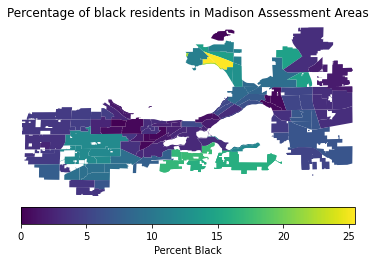

In [12]:
def setup_map_axes():
    fig1, ax1 = plt.subplots()
    ax1.set_axis_off()
    ax1.set_xlim(-89.57, -89.245)
    ax1.set_ylim(43.00, 43.17)
    ax1.margins(0.0)
    #fig1.tight_layout()
    return (fig1, ax1)

legend_options={'label': "Percent Black",'orientation': "horizontal", 'pad': 0.05}


fig, ax = setup_map_axes()
ax.set_title("Percentage of black residents in Madison Assessment Areas")
areas_with_info.plot(ax=ax, column="Black_Percentage", legend=True, legend_kwds=legend_options)